**Ankit Sekseria**<br>
**D19005**<br>
**Varishu Pant**<br>
**D19033**

## Question 3:
*Read the context carefully:*
In addition to carefully selecting the dissimilarity measure used, one must also consider whether or not the variables should be scaled to have standard deviation one before the dissimilarity between the observations is computed. To illustrate this point, we continue with the online shopping example just described. Some items may be purchased more frequently than others; for instance, a shopper might buy ten pairs of socks a year, but a computer very rarely. High-frequency purchases like socks therefore tend to have a much larger effect on the inter-shopper dissimilarities, and hence on the clustering ultimately obtained, than rare purchases like computers. This may not be desirable. If the variables are scaled to have standard deviation one before the inter-observation dissimilarities are computed, then each variable will in effect be given equal importance in the hierarchical clustering performed. We might also want to scale the variables to have standard deviation one if they are measured on different scales; otherwise, the choice of units (e.g. centimeters versus kilometers) for a particular variable will greatly affect the dissimilarity measure obtained. It should come as no surprise that whether or not it is a good decision to scale the variables before computing the dissimilarity measure depends on the application at hand.
Consider the USArrests data. We will now perform hierarchical clustering on the states.

- Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
- Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?
- Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.
- What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.


In [249]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy as hi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize


In [23]:
arrests=pd.read_csv(r'D:\Praxis docs\MI\USArrests.csv') #loading data

In [24]:
arrests.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [25]:
print("Database has {} observations (customers) and {} columns (attributes).".format(arrests.shape[0],arrests.shape[1]))
print("\nMissing values in each column:\n{}".format(arrests.isnull().sum()))
print("\nColumns data types:\n{}".format(arrests.dtypes))

Database has 50 observations (customers) and 5 columns (attributes).

Missing values in each column:
Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

Columns data types:
Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object


In [26]:
n_unique = arrests.nunique()
print("Number of unique values:\n{}".format(n_unique)) #unique values

Number of unique values:
Unnamed: 0    50
Murder        43
Assault       45
UrbanPop      36
Rape          48
dtype: int64


In [84]:
print("Unique values in each categorical column:\n")
for col in arrests.select_dtypes(include=[object]):
    print(col,":", arrests[col].unique())

Unique values in each categorical column:

Unnamed: 0 : ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [27]:
df=arrests.drop(arrests.columns[0], inplace=False, axis=1)  #Removing index column

In [29]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


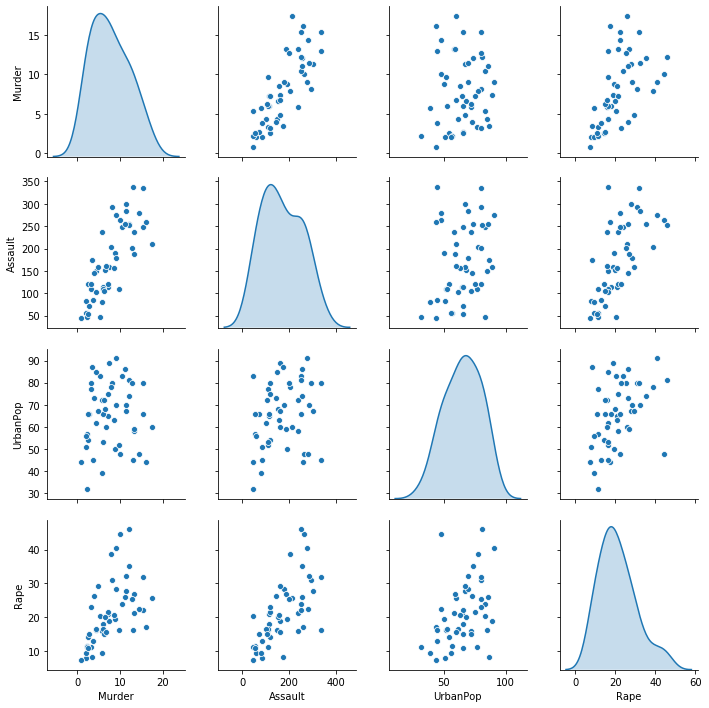

In [97]:
sns.pairplot(df,diag_kind='kde') #distribution of plots
plt.show()

In [100]:
corr=df.corr()  #correlation matrix 
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Murder,Assault,UrbanPop,Rape
Murder,1,0.8,0.07,0.56
Assault,0.8,1,0.26,0.67
UrbanPop,0.07,0.26,1,0.41
Rape,0.56,0.67,0.41,1


**Observation**
- There's a very high positve correlation between Murder and Assault .
- There's a high positive correlation between Assault and Rape.
- There's a medium strength positive correlation between UrbanPop and Rape. 
- There's a weak positive correlation between UrbanPop and Assault.
- There's no linear relationship between UrbanPop and Murder.

#### Q1)Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.

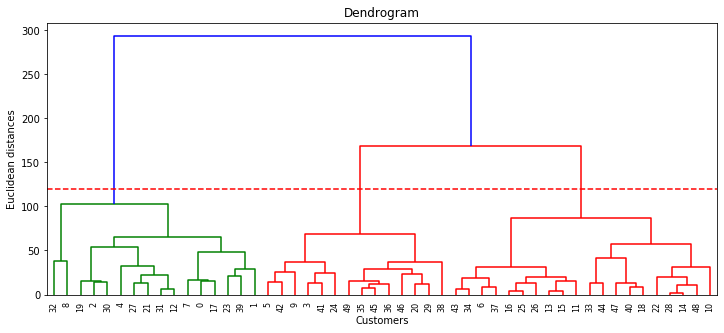

In [179]:
plt.rcParams['figure.figsize'] = [12, 5]
dist_mat=hi.linkage(df, method  = "complete",metric='euclidean',optimal_ordering=True)
dendrogram = hi.dendrogram(dist_mat)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.axhline(y=120, color='r', linestyle='--')
plt.ylabel('Euclidean distances')
plt.show()

In [180]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
clusters=cluster.fit_predict(df)
clustered_data=arrests.assign(Cluster=cluster.labels_)
grouped_km = clustered_data.groupby(['Cluster']).mean().round()
grouped_km

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,12.0,273.0,68.0,28.0
1,4.0,88.0,60.0,14.0
2,8.0,173.0,71.0,23.0


**Observation**
- On an average ,states in Cluster 0 are affected by the most amount of crimes in each category ,Assault,Murder and Rape and have the second highest Urban Population.
- On an average ,states in Cluster 1 have the least frequency in each reported crime and also least percent od people living there.
- On an average, states in Cluster 2 have the highest percent population and are second in each crime frequency.

#### Q2)	Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

In [133]:
print('States in Cluster 0:')
pd.DataFrame(clustered_data.iloc[np.where(clustered_data.loc[:,'Cluster']==0)].iloc[:,0]).T

States in Cluster 0:


,0,1,2,4,7,8,12,17,19,21,23,27,30,31,32,39
Unnamed: 0,Alabama,Alaska,Arizona,California,Delaware,Florida,Illinois,Louisiana,Maryland,Michigan,Mississippi,Nevada,New Mexico,New York,North Carolina,South Carolina


In [115]:
print('States in Cluster 1:')
pd.DataFrame(clustered_data.iloc[np.where(clustered_data.loc[:,'Cluster']==1)].iloc[:,0]).T

States in Cluster 1:


,6,10,11,13,14,15,16,18,22,25,26,28,33,34,37,40,43,44,47,48
Unnamed: 0,Connecticut,Hawaii,Idaho,Indiana,Iowa,Kansas,Kentucky,Maine,Minnesota,Montana,Nebraska,New Hampshire,North Dakota,Ohio,Pennsylvania,South Dakota,Utah,Vermont,West Virginia,Wisconsin


In [116]:
print('States in Cluster 2:')
pd.DataFrame(clustered_data.iloc[np.where(clustered_data.loc[:,'Cluster']==2)].iloc[:,0]).T

States in Cluster 2:


,3,5,9,20,24,29,35,36,38,41,42,45,46,49
Unnamed: 0,Arkansas,Colorado,Georgia,Massachusetts,Missouri,New Jersey,Oklahoma,Oregon,Rhode Island,Tennessee,Texas,Virginia,Washington,Wyoming


#### Q3)	Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In [204]:
#Standardizing Data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [205]:
df_scaled.describe()

,Murder,Assault,UrbanPop,Rape
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,-8.437695e-17,1.298961e-16,-4.263256e-16,8.326673e-16
std,1.010153e+00,1.010153e+00,1.010153e+00,1.010153e+00
min,-1.620693e+00,-1.524362e+00,-2.340661e+00,-1.502548e+00
25%,-8.611383e-01,-7.486054e-01,-7.704502e-01,-6.640245e-01
50%,-1.247758e-01,-1.425453e-01,3.210209e-02,-1.220847e-01
75%,8.029251e-01,9.483628e-01,8.521012e-01,5.330962e-01
max,2.229265e+00,2.015028e+00,1.776781e+00,2.671197e+00


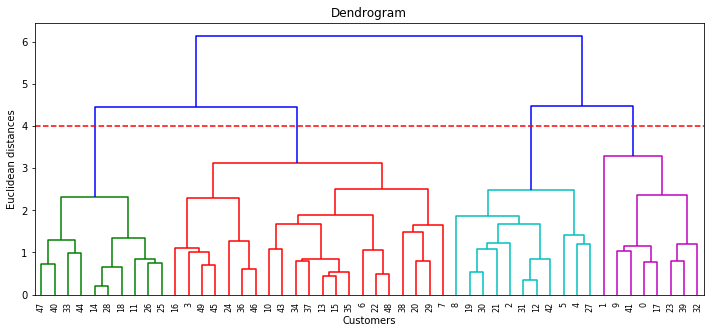

In [239]:
plt.rcParams['figure.figsize'] = [12, 5]
#Using average linkage ,we cut the tree to get optimal clusters as 3
dist_mat=hi.linkage(df_scaled, method  = "complete",metric='euclidean',optimal_ordering=True) #using complete linkage and euclidean
dendrogram = hi.dendrogram(dist_mat)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.axhline(y=4, color='r', linestyle='--')
plt.ylabel('Euclidean distances')
plt.show()

In [234]:
#gettiing optimal cutoff at 4.
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
clusters_scaled=cluster.fit_predict(df_scaled) #using scaled data
clustered_data=arrests.assign(Cluster=cluster.labels_)
grouped_km = clustered_data.groupby(['Cluster']).mean().round()
grouped_km

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,14.0,253.0,54.0,25.0
1,6.0,134.0,71.0,19.0
2,11.0,264.0,79.0,33.0
3,3.0,79.0,49.0,12.0


**Observations**
- On an average,states in Cluster 0 max out in Murder cases.
- On an average,states in Cluster 1 have a high population and a fairly large number of crimes, in fact, they have second most crime frequency in each crime.
- On an average,states in Cluster 2 max out in Assault and Rape cases and also have the maximum population.
- On an average,states in Cluster 3 have the minimum crime rate in each case and have the minimum population too.

#### Q4)	What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

#### Comparing the two clustering results

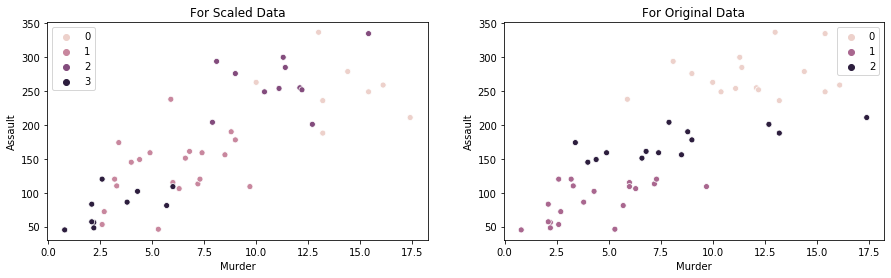

In [241]:
plt.rcParams['figure.figsize'] = [15, 4]  #comparing the two results side by side

fig, axes = plt.subplots(1, 2)
axes[0].set_title('For Scaled Data')
axes[1].set_title('For Original Data')

sns.scatterplot(x=arrests['Murder'], y = arrests['Assault'],hue=clusters_scaled,ax=axes[0])
sns.scatterplot(x=arrests['Murder'], y = arrests['Assault'],hue=clusters,ax=axes[1])
plt.show()

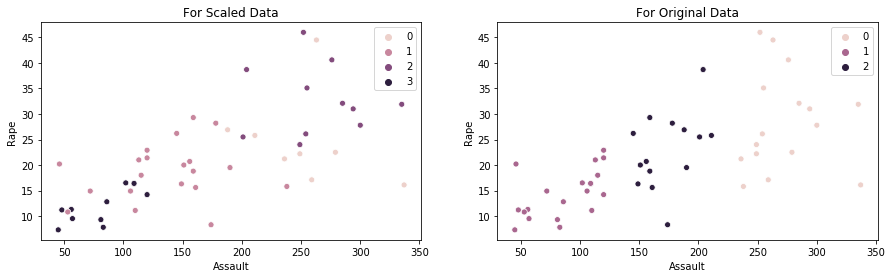

In [242]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('For Scaled Data')
axes[1].set_title('For Original Data')

sns.scatterplot(x=arrests['Assault'], y = arrests['Rape'],hue=clusters_scaled,ax=axes[0]) #plotting against arrest and rape
sns.scatterplot(x=arrests['Assault'], y = arrests['Rape'],hue=clusters,ax=axes[1])
plt.show()

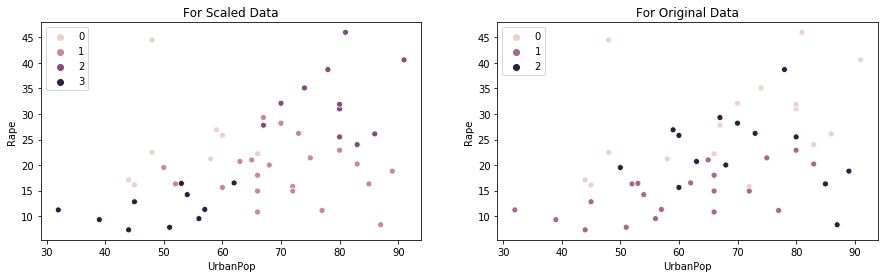

In [243]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('For Scaled Data')
axes[1].set_title('For Original Data')

sns.scatterplot(x=arrests['UrbanPop'], y = arrests['Rape'],hue=clusters_scaled,ax=axes[0]) #plotting against urbanpop and rape
sns.scatterplot(x=arrests['UrbanPop'], y = arrests['Rape'],hue=clusters,ax=axes[1])
plt.show()

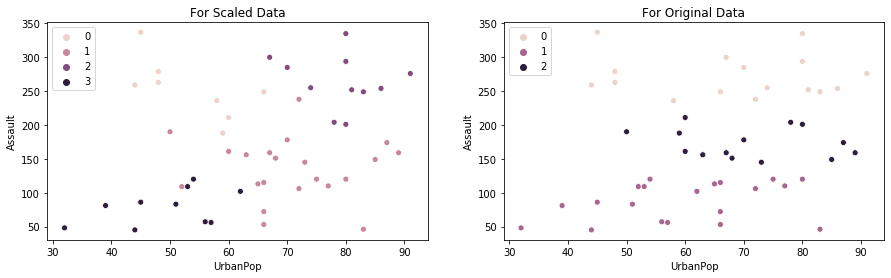

In [244]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('For Scaled Data')W
axes[1].set_title('For Original Data')
#plotting against urbanpop and assault
sns.scatterplot(x=arrests['UrbanPop'], y = arrests['Assault'],hue=clusters_scaled,ax=axes[0]) 
sns.scatterplot(x=arrests['UrbanPop'], y = arrests['Assault'],hue=clusters,ax=axes[1])
plt.show()

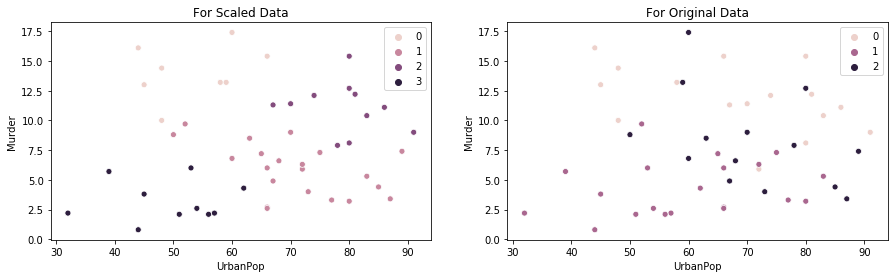

In [245]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title('For Scaled Data')
axes[1].set_title('For Original Data')
#plotting against urbanpop and murder
sns.scatterplot(x=arrests['UrbanPop'], y = arrests['Murder'],hue=clusters_scaled,ax=axes[0])
sns.scatterplot(x=arrests['UrbanPop'], y = arrests['Murder'],hue=clusters,ax=axes[1])
plt.show()

**Observations**

- We can see that 4 clusters on scaled data group data better than 3 clusters on original data.

### Should the variables be scaled before the inter-observation dissimilarities are computed? 

Standardizing data is recommended because otherwise the range of values in each feature will act as a weight when determining how to cluster data, which is typically undesired.So it becomes an essential step before clustering as Euclidean distance is very sensitive to the changes in the differences.

In the original data, Assault variable was on a bigger scale than other variables, hence was driving the clustering algorithm. So the clusters formed were not true. After scaling data so that standard deviation of all variables become 1,each variable was given equal weightage and thus the clusters formed were better.

From business perspective, we can say that if clustering results on non-scaled data would have been used, it would not be the best outcome as states with high assault cases would be clustered together while other more heinous crimes such as Murder and Rape would have been kept on the sidelines.